# Лабараторная работа №2.
### Выполнил: Росляков Владислав Александрович
### Группа: ББМО-01-23

In [6]:
import kagglehub

path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")
print("Путь к датасету в среде Google Colab:", path)

Путь к датасету в среде Google Colab: /root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1


In [7]:
!mv /root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/ /content/gtsrb

In [ ]:
import torch
device = torch.device("cuda")

In [8]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Загрузка и подготовка набора данных
def load_gtsrb_data(data_dir):
    images = []
    labels = []
    for label in range(43):
        class_dir = os.path.join(data_dir, str(label))
        if not os.path.exists(class_dir):
            print(f"Папка {class_dir} не найдена. Пропускаем...")
            continue
        for file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, file)
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=(32, 32))
            img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

data_dir = "/content/gtsrb/1/train"

# Загрузка данных
images, labels = load_gtsrb_data(data_dir)

# Разделение на обучающую, валидационную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# One-hot encoding меток классов
y_train = to_categorical(y_train, num_classes=43)
y_val = to_categorical(y_val, num_classes=43)
y_test = to_categorical(y_test, num_classes=43)

print(f"Размеры: X_train={X_train.shape}, X_val={X_val.shape}, X_test={X_test.shape}")

Размеры: X_train=(27446, 32, 32, 3), X_val=(5881, 32, 32, 3), X_test=(5882, 32, 32, 3)


In [9]:
# Для уменьшения времени работы проведем обучение лишь на ограниченной выборке из 5000 штук
small_X_train = X_train[:5000]
small_y_train = y_train[:5000]

In [10]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Model, layers, optimizers

# Загрузка VGG16 с предобученными весами
base_model_vgg = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
x = layers.Flatten()(base_model_vgg.output)
x = layers.Dense(128, activation="relu")(x)
output = layers.Dense(43, activation="softmax")(x)

model_vgg = Model(inputs=base_model_vgg.input, outputs=output)

# Компиляция модели
model_vgg.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Обучение
history_vgg = model_vgg.fit(
    small_X_train, small_y_train,
    validation_data=(X_val, y_val),
    epochs=5,
    batch_size=32
)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 541s 3s/step - accuracy: 0.0521 - loss: 3.6164 - val_accuracy: 0.1175 - val_loss: 3.2371
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 555s 4s/step - accuracy: 0.1505 - loss: 3.0594 - val_accuracy: 0.1806 - val_loss: 2.9567
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 539s 3s/step - accuracy: 0.2469 - loss: 2.2841 - val_accuracy: 0.3372 - val_loss: 1.8818
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 544s 3s/step - accuracy: 0.3408 - loss: 1.9627 - val_accuracy: 0.4123 - val_loss: 1.7052
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 561s 3s/step - accuracy: 0.4675 - loss: 1.5313 - val_accuracy: 0.5545 - val_loss: 1.2454


In [11]:
from tensorflow.keras.applications import ResNet50

# Загрузка ResNet50 с предобученными весами
base_model_resnet = ResNet50(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
x = layers.Flatten()(base_model_resnet.output)
x = layers.Dense(128, activation="relu")(x)
output = layers.Dense(43, activation="softmax")(x)

model_resnet = Model(inputs=base_model_resnet.input, outputs=output)

# Компиляция модели
model_resnet.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Обучение
history_resnet = model_resnet.fit(
    small_X_train, small_y_train,
    validation_data=(X_val, y_val),
    epochs=5,
    batch_size=32
)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.2736 - loss: 3.0463 - val_accuracy: 0.0461 - val_loss: 4.7181
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 384s 2s/step - accuracy: 0.6365 - loss: 1.2410 - val_accuracy: 0.0451 - val_loss: 4.9196
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - accuracy: 0.7529 - loss: 0.8628 - val_accuracy: 0.2372 - val_loss: 2.8368
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 342s 2s/step - accuracy: 0.8065 - loss: 0.6955 - val_accuracy: 0.3659 - val_loss: 3.4850
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 397s 2s/step - accuracy: 0.8321 - loss: 0.5718 - val_accuracy: 0.4501 - val_loss: 2.6229


VGG16 - Тестовая точность: 0.55, Тестовая потеря: 1.27
ResNet50 - Тестовая точность: 0.45, Тестовая потеря: 2.68


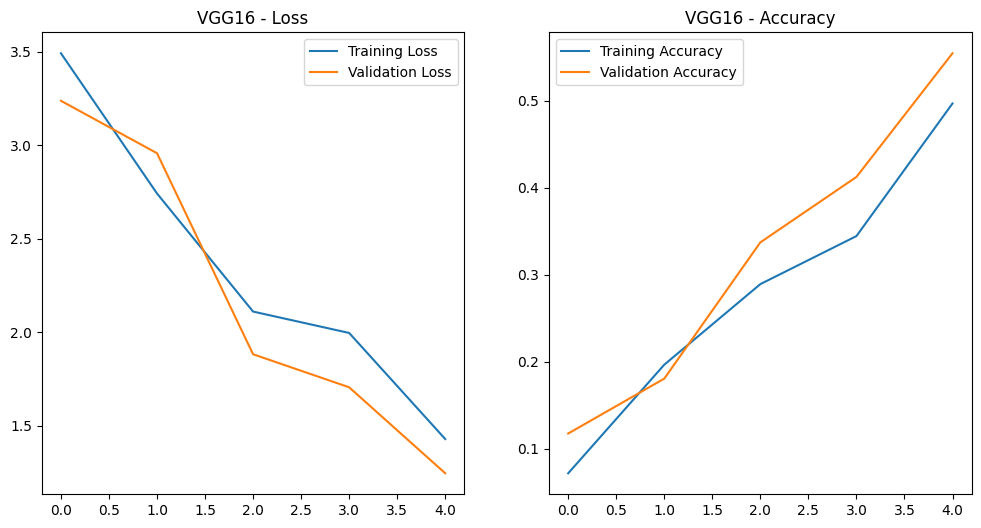

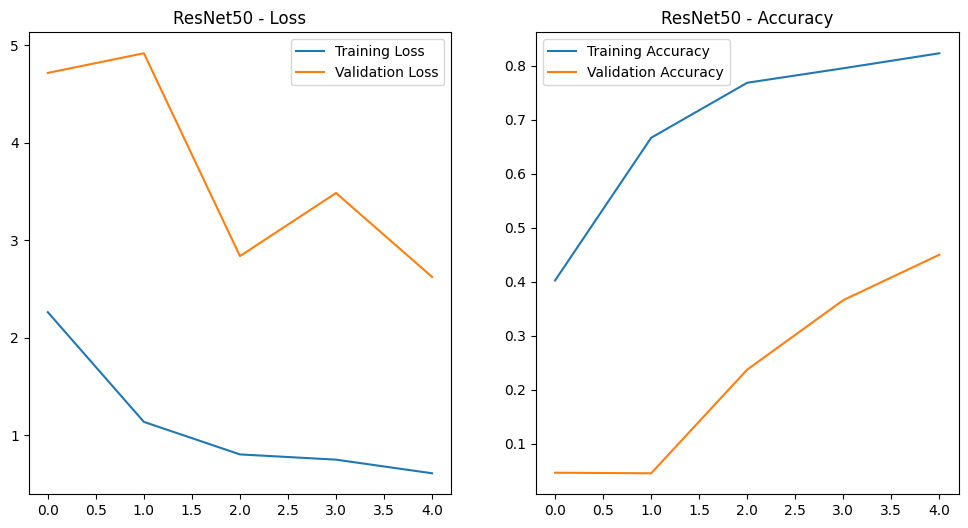

In [12]:
# Оценка моделей
vgg_eval = model_vgg.evaluate(X_test, y_test, verbose=0)
resnet_eval = model_resnet.evaluate(X_test, y_test, verbose=0)

print(f"VGG16 - Тестовая точность: {vgg_eval[1]:.2f}, Тестовая потеря: {vgg_eval[0]:.2f}")
print(f"ResNet50 - Тестовая точность: {resnet_eval[1]:.2f}, Тестовая потеря: {resnet_eval[0]:.2f}")

# Построение графиков функции потерь и точности
def plot_history(history, title):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title(f"{title} - Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["accuracy"], label="Training Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title(f"{title} - Accuracy")
    plt.legend()
    plt.show()

plot_history(history_vgg, "VGG16")
plot_history(history_resnet, "ResNet50")

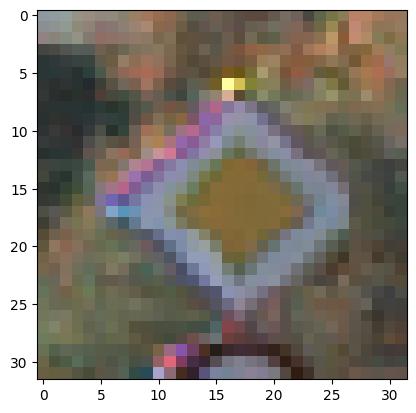

In [13]:
def fgsm_attack(model, image, label, epsilon=0.01):
    image = tf.convert_to_tensor([image], dtype=tf.float32)
    label = tf.convert_to_tensor([label], dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        loss = tf.keras.losses.categorical_crossentropy(label, prediction)

    gradient = tape.gradient(loss, image)
    perturbation = epsilon * tf.sign(gradient)
    adversarial_image = tf.clip_by_value(image + perturbation, 0, 1)
    return adversarial_image[0]

# Пример атаки на одно изображение
adv_image = fgsm_attack(model_vgg, X_test[0], y_test[0])
plt.imshow(adv_image.numpy())

In [14]:
# Проверка эффективности FGSM-атак на ResNet50
for i in range(10):  # Пример из 10 изображений
    adv_image = fgsm_attack(model_vgg, X_test[i], y_test[i])
    pred_resnet = np.argmax(model_resnet.predict(tf.convert_to_tensor([adv_image])))
    true_label = np.argmax(y_test[i])
    print(f"Истинный класс: {true_label}, Предсказание ResNet50: {pred_resnet}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Истинный класс: 12, Предсказание ResNet50: 12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Истинный класс: 10, Предсказание ResNet50: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Истинный класс: 10, Предсказание ResNet50: 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Истинный класс: 25, Предсказание ResNet50: 25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Истинный класс: 3, Предсказание ResNet50: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Истинный класс: 28, Предсказание ResNet50: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Истинный класс: 33, Предсказание ResNet50: 36
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Истинный класс: 1, Предсказание ResNet50: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Истинный класс: 30, Предсказание ResNet50: 31
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Истинный класс: 11, Предсказание ResNet50: 2
